In [18]:
import pandas as pd
import json

# Load JSON data from file
with open('/Users/robin/capstone/sentify_recommender/data/challenge_set.json', 'r') as file: # Replace with local dataset path
    data = json.load(file)

# Initialize an empty list to collect all track data
all_tracks = []

# Loop through each playlist in the dataset
for playlist in data['playlists']:
    for track in playlist['tracks']:
        # Add playlist-level information to each track record
        track_info = {
            'playlist_name': playlist.get('name', 'Unknown'),
            'playlist_pid': playlist['pid'],
            'playlist_num_tracks': playlist['num_tracks'],
            'track_pos': track['pos'],
            'artist_name': track['artist_name'],
            'track_uri': track['track_uri'],
            'artist_uri': track['artist_uri'],
            'track_name': track['track_name'],
            'album_uri': track['album_uri'],
            'duration_ms': track['duration_ms'],
            'album_name': track['album_name']
        }
        all_tracks.append(track_info)

# Convert the list of track dictionaries to a DataFrame
df_spotify = pd.DataFrame(all_tracks)

# Display the first few rows of the DataFrame to verify
print(df_spotify.head())

  playlist_name  playlist_pid  playlist_num_tracks  track_pos artist_name   
0         Party       1000000                   75          0   AronChupa  \
1         Party       1000000                   75          1   AronChupa   
2         Party       1000000                   75          2       Lorde   
3         Party       1000000                   75          3       Lorde   
4         Party       1000000                   75          4       Lorde   

                              track_uri   
0  spotify:track:66U0ASk1VHZsqIkpMjKX3B  \
1  spotify:track:5MhsZlmKJG6X5kTHkdwC4B   
2  spotify:track:0GZoB8h0kqXn7XFm4Sj06k   
3  spotify:track:35kahykNu00FPysz3C2euR   
4  spotify:track:3G6hD9B2ZHOsgf4WfNu7X1   

                              artist_uri   
0  spotify:artist:5vCOdeiQt9LyzdI87kt5Sh  \
1  spotify:artist:5vCOdeiQt9LyzdI87kt5Sh   
2  spotify:artist:163tK9Wjr9P9DmM0AVK7lm   
3  spotify:artist:163tK9Wjr9P9DmM0AVK7lm   
4  spotify:artist:163tK9Wjr9P9DmM0AVK7lm   

             

In [19]:
# Dataframe Column Names
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281000 entries, 0 to 280999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   playlist_name        281000 non-null  object
 1   playlist_pid         281000 non-null  int64 
 2   playlist_num_tracks  281000 non-null  int64 
 3   track_pos            281000 non-null  int64 
 4   artist_name          281000 non-null  object
 5   track_uri            281000 non-null  object
 6   artist_uri           281000 non-null  object
 7   track_name           281000 non-null  object
 8   album_uri            281000 non-null  object
 9   duration_ms          281000 non-null  int64 
 10  album_name           281000 non-null  object
dtypes: int64(4), object(7)
memory usage: 23.6+ MB


In [20]:
spotify = df_spotify

num_features = []

# Numerical Features
num_features = list(['playlist_num_tracks', 'track_pos', 'duration_ms'])

print(num_features)

['playlist_num_tracks', 'track_pos', 'duration_ms']


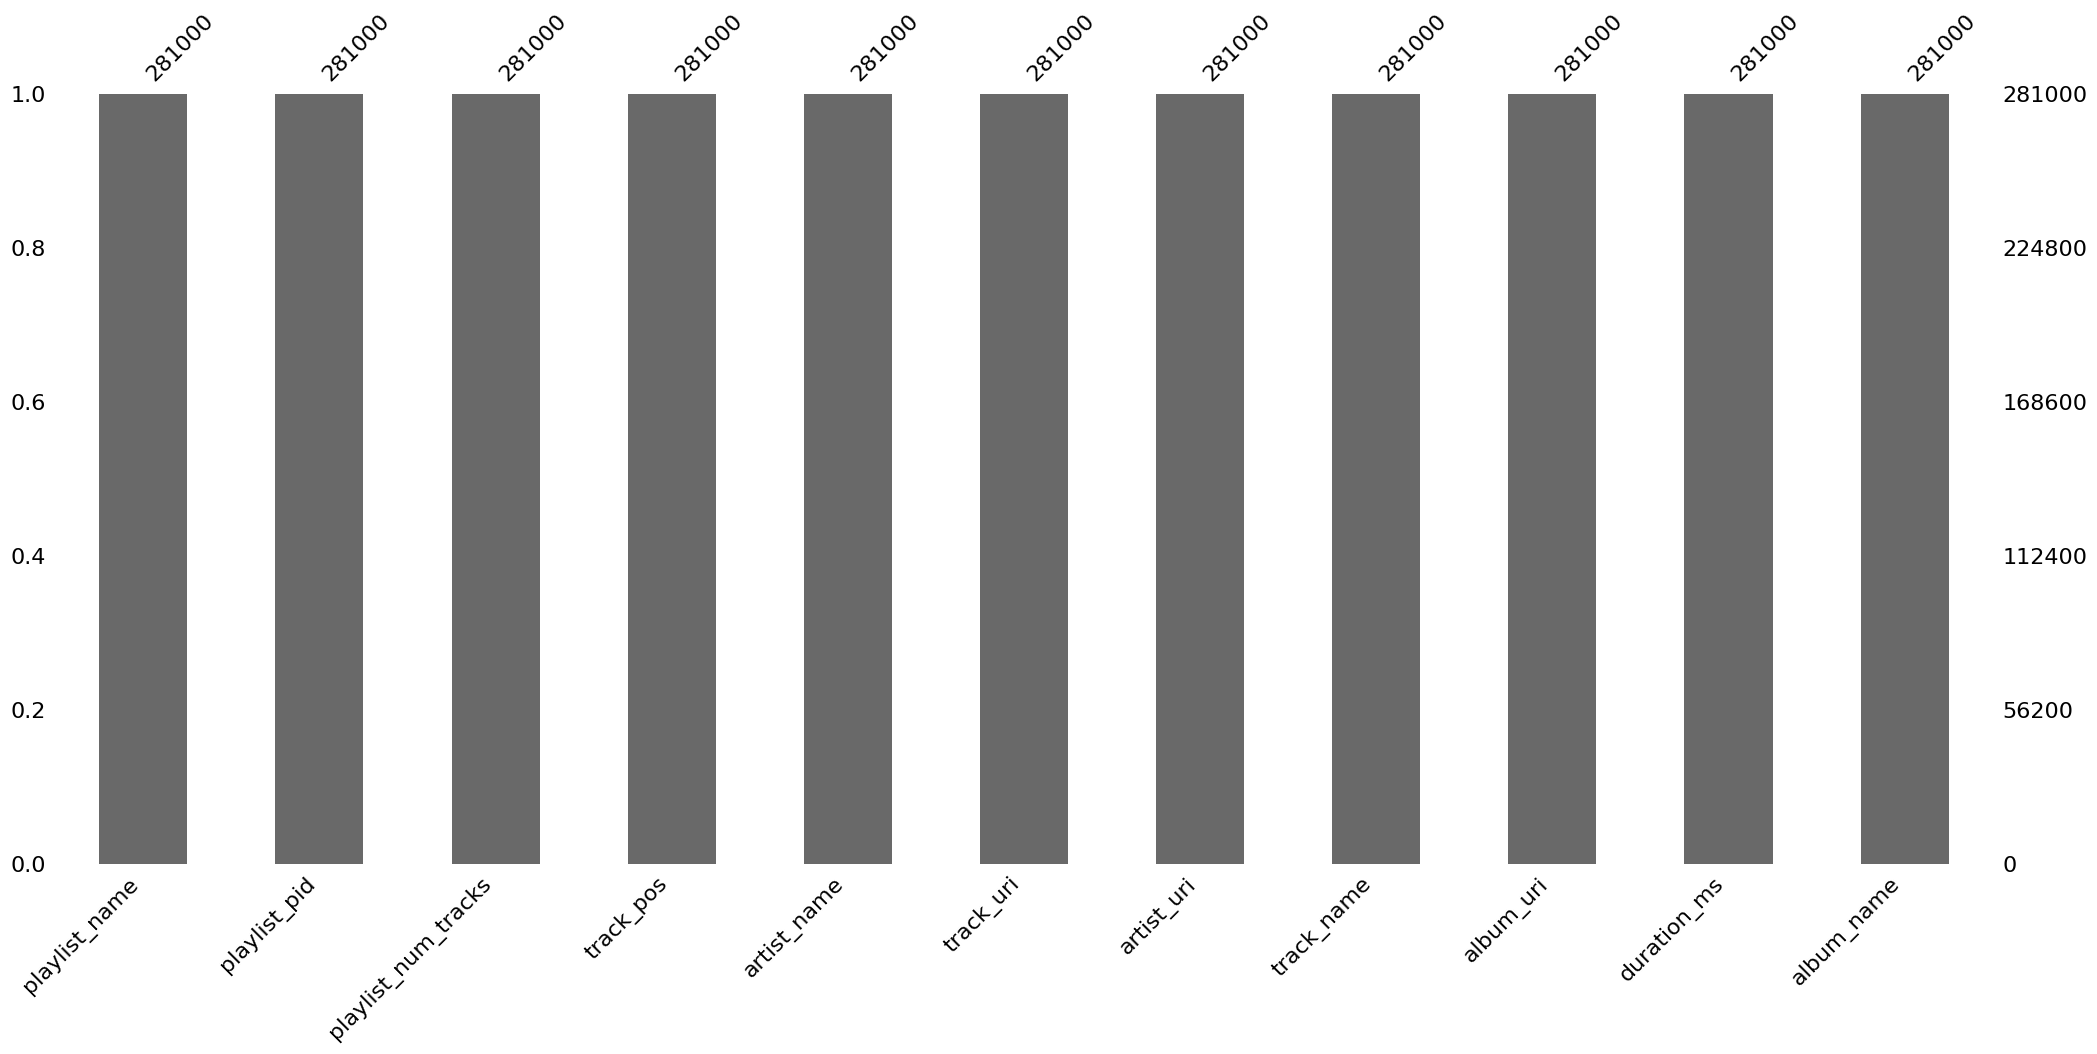

In [21]:
import missingno as msno
%matplotlib inline

msno.bar(spotify.sample(len(spotify)));

In [22]:
#Calculate missing data
spotify.isna().value_counts()

playlist_name  playlist_pid  playlist_num_tracks  track_pos  artist_name  track_uri  artist_uri  track_name  album_uri  duration_ms  album_name
False          False         False                False      False        False      False       False       False      False        False         281000
Name: count, dtype: int64

In [23]:
spotify['duration_ms'].describe().divide(60000).round(2)

count      4.68
mean       3.88
std        1.05
min        0.00
25%        3.33
50%        3.74
75%        4.27
max      152.64
Name: duration_ms, dtype: float64

/Users/robin/capstone/sentify_recommender/.venv/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


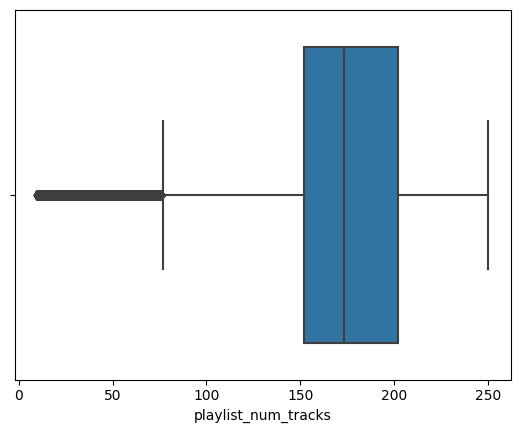

In [24]:
import seaborn as sns

sns.boxplot(spotify['playlist_num_tracks']);

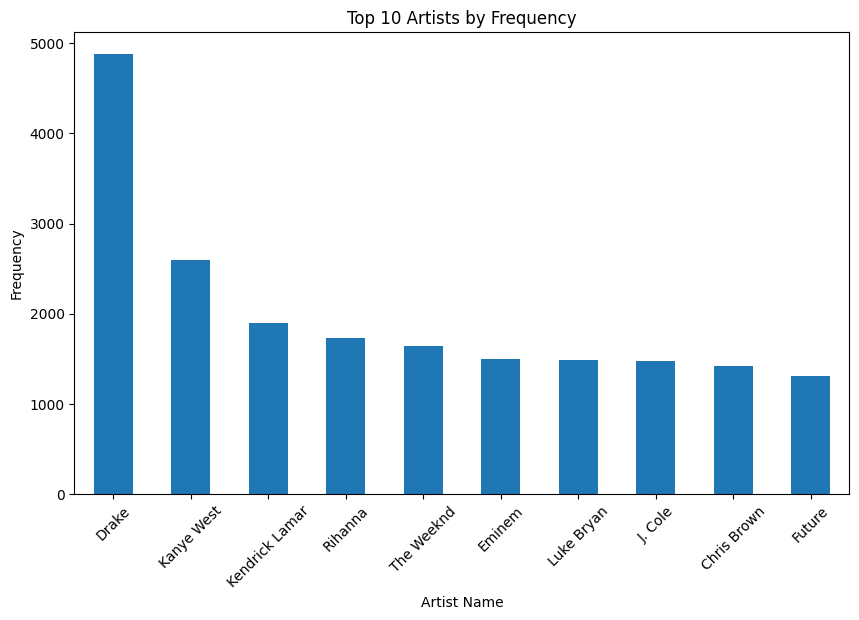

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'spotify' is your DataFrame
top_artists = spotify.groupby('artist_uri').size().sort_values(ascending=False).head(10)
top_artist_names = spotify.groupby('artist_uri')['artist_name'].first().loc[top_artists.index]

# Plotting
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar')
plt.xticks(range(len(top_artist_names)), top_artist_names, rotation=45)
plt.xlabel('Artist Name')
plt.ylabel('Frequency')
plt.title('Top 10 Artists by Frequency')
plt.show()


In [26]:
result = spotify[spotify['artist_name'] == '44']

result.count()

playlist_name          0
playlist_pid           0
playlist_num_tracks    0
track_pos              0
artist_name            0
track_uri              0
artist_uri             0
track_name             0
album_uri              0
duration_ms            0
album_name             0
dtype: int64

In [27]:
spotify['playlist_name'].unique()

array(['Party', 'school', 'Modern Music', ..., 'Girlz', "let's get lost",
       'Mama'], dtype=object)

In [28]:
spotify['artist_uri'].nunique()

14098

# Bennet